<a href="https://colab.research.google.com/github/gabilodeau/INF6804/blob/master/clip_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### INF6804 Vision par ordinateur

**Polytechnique Montréal**  
**Auteur :** Khalil Sabri  

**Description :** Ce Jupyter notebook présente un exemple d'utilisation du modèle CLIP (Contrastive Language-Image Pretraining) pour classifier des images à l'aide du dataset CIFAR-10. Il est divisé en sept parties :


1. **Importation des modules :** Importation des modules essentiels pour le traitement des images, la manipulation des datasets, et le modèle CLIP.  
2. **Chargement du modèle CLIP :** Initialisation du modèle CLIP et de son processeur depuis Hugging Face.  
3. **Définition des classes et des textes :** Les classes de CIFAR-10 sont associées à des descriptions textuelles compréhensibles par CLIP.  
4. **Chargement du dataset :** Le dataset CIFAR-10 (ensemble de test) est téléchargé et configuré pour renvoyer des images brutes au format PIL, avec une fonction de collecte personnalisée.  
5. **Fonctions utilitaires :** Fonctions pour afficher les images avec leurs prédictions et probabilités associées.  
6. **Inférence et visualisation :** Inférence sur quelques images aléatoires du dataset avec affichage des résultats et prédictions.


### 1. Imports

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as plt

### 2. Load CLIP Model and Processor

In [ ]:
model_name = "openai/clip-vit-base-patch16" # you can change model name here with patch size -- search in Hugging face.
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

### 3. Define Classes and Text Prompts

In [ ]:
cifar10_classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]
text_prompts = [f"a photo of a {label}" for label in cifar10_classes]


## 4. Load the CIFAR-10 Dataset

- We set transform=None so that the dataset returns raw PIL images.
- We define a simple collate_fn that returns batches of (pil_image, label) pairs as lists. This bypasses PyTorch’s default collate function that expects tensors.



In [ ]:
dataset = datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=None  # return raw PIL images
)

# Custom collate function to keep PIL images untransformed in batches
def pil_collate_fn(batch):
    # batch is a list of (pil_image, label) pairs
    # Just return them as two lists (or lists of size 1 if batch_size=1)
    pil_images = [item[0] for item in batch]
    labels = [item[1] for item in batch]
    return pil_images, labels

dataloader = DataLoader(
    dataset,
    batch_size=1,  # can increase this if you like
    shuffle=True,
    collate_fn=pil_collate_fn
)


Files already downloaded and verified


### 5. Helper Functions


#### 5.1 Display Image and Predictions

In [ ]:
def display_image_and_predictions(pil_image, true_label_idx, probs, text_prompts):
    """
    Displays the given PIL image with its true label,
    along with the probabilities for each text prompt.
    """
    # Show the image
    plt.imshow(pil_image)
    plt.axis('off')
    plt.title(f"True Label: {cifar10_classes[true_label_idx]}")
    plt.show()

    # Print probabilities
    print("Label probabilities:")
    for prompt, prob in zip(text_prompts, probs):
        print(f"{prompt}: {prob:.2%}")

    # Print predicted class
    predicted_class = text_prompts[probs.argmax()]
    print(f"Predicted class: {predicted_class}")
    print("-" * 50)


### 6. Inference Loop


  - We iterate through a few samples (e.g., 5).
  - CLIPProcessor handles resizing/normalization on the fly.
  - We compute probabilities and display each result.

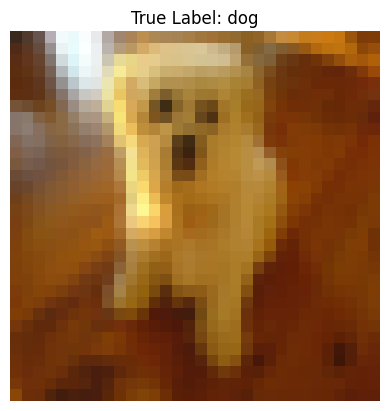

Label probabilities:
a photo of a airplane: 0.06%
a photo of a automobile: 0.18%
a photo of a bird: 0.38%
a photo of a cat: 0.75%
a photo of a deer: 0.19%
a photo of a dog: 97.18%
a photo of a frog: 0.12%
a photo of a horse: 0.96%
a photo of a ship: 0.08%
a photo of a truck: 0.11%
Predicted class: a photo of a dog
--------------------------------------------------


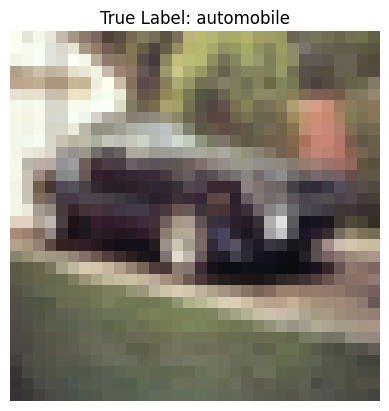

Label probabilities:
a photo of a airplane: 0.02%
a photo of a automobile: 86.04%
a photo of a bird: 0.10%
a photo of a cat: 0.11%
a photo of a deer: 0.40%
a photo of a dog: 0.38%
a photo of a frog: 0.08%
a photo of a horse: 0.13%
a photo of a ship: 0.05%
a photo of a truck: 12.69%
Predicted class: a photo of a automobile
--------------------------------------------------


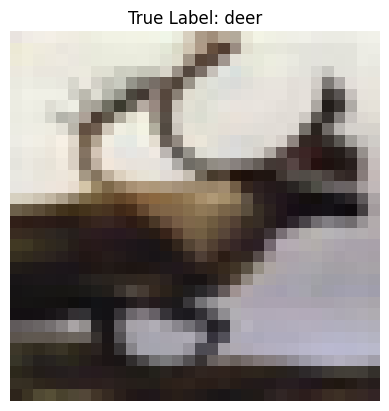

Label probabilities:
a photo of a airplane: 1.86%
a photo of a automobile: 5.71%
a photo of a bird: 1.75%
a photo of a cat: 0.44%
a photo of a deer: 72.28%
a photo of a dog: 2.86%
a photo of a frog: 0.09%
a photo of a horse: 13.88%
a photo of a ship: 0.78%
a photo of a truck: 0.34%
Predicted class: a photo of a deer
--------------------------------------------------


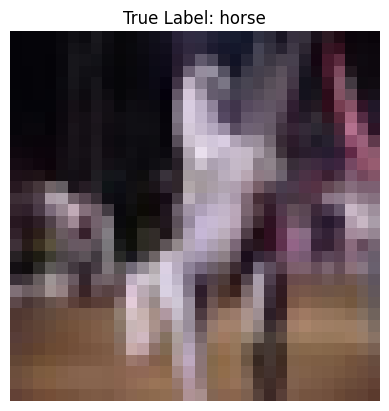

Label probabilities:
a photo of a airplane: 0.16%
a photo of a automobile: 0.55%
a photo of a bird: 3.32%
a photo of a cat: 1.65%
a photo of a deer: 6.55%
a photo of a dog: 2.16%
a photo of a frog: 0.13%
a photo of a horse: 84.81%
a photo of a ship: 0.32%
a photo of a truck: 0.36%
Predicted class: a photo of a horse
--------------------------------------------------


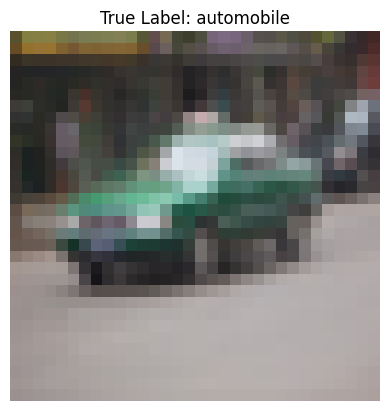

Label probabilities:
a photo of a airplane: 0.22%
a photo of a automobile: 93.95%
a photo of a bird: 0.30%
a photo of a cat: 0.17%
a photo of a deer: 0.10%
a photo of a dog: 0.23%
a photo of a frog: 0.21%
a photo of a horse: 0.23%
a photo of a ship: 0.41%
a photo of a truck: 4.17%
Predicted class: a photo of a automobile
--------------------------------------------------


In [ ]:
num_samples_to_display = 5

for i, (pil_images, labels) in enumerate(dataloader):
    if i == num_samples_to_display:
        break

    # pil_images is a list of size=1 (since batch_size=1)
    pil_image = pil_images[0]
    label = labels[0]

    # Preprocess image (PIL) and text using CLIPProcessor
    inputs = processor(
        text=text_prompts,
        images=pil_image,
        return_tensors="pt",
        padding=True
    )

    # Inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Get probabilities
    logits_per_image = outputs.logits_per_image  # shape [batch_size, num_text_prompts]
    probs = logits_per_image.softmax(dim=1).squeeze()

    # Display the result
    display_image_and_predictions(pil_image, label, probs, text_prompts)
